# Functional Principal Components Analysis (fPCA)

This notebook describes functional PCA using **fdaM**. A useful reference is:

* Ramsay JO et al. (2009) [Functional Data Analysis with R and MATLAB](https://www.springer.com/jp/book/9780387981840)

____________
## Step 1:  Create basis functions

In [1]:
forcebasis = create_bspline_basis([0,100], 51, 6); 

____________
## Step 2: Create smoothing definition and roughness penalty

In [2]:
Lfdobj              = int2Lfd(4); 
smoothing_parameter = 1e-15;
forcefdPar          = fdPar(forcebasis, Lfdobj, smoothing_parameter);

____________
## Step 3:  Load data & fit to the functional data model


In [3]:
load('Warmenhoven2018-bow-force.mat');

time                    = linspace(0, 100, 51)'; 
Pin_Force_Bow_fd        = smooth_basis(time, [Pin_Force_Bow_Male Pin_Force_Bow_Female], forcefdPar);

____________
## Step 4:  PCA

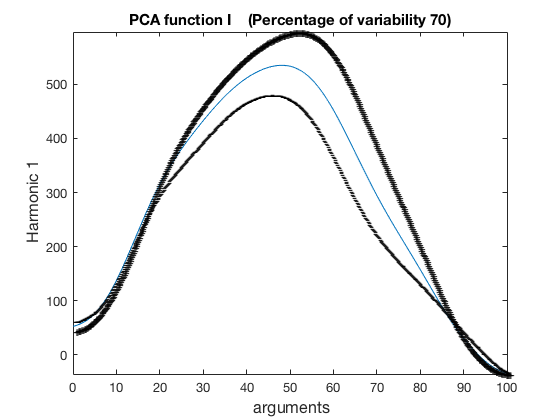

In [4]:
nharm  = 5;
Pin_Force_Bow_pcastr = pca_fd(Pin_Force_Bow_fd, nharm, forcefdPar);
plot_pca_fd(Pin_Force_Bow_pcastr, 0, 1, 0, 0, 0);